# CPS 840 / CP 8318 Assignment 2
## CPS 840 [30 Marks]
## CP 8318 [36 Marks]

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression as LR
from sklearn import svm
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.svm import SVC
# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [2]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [3]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [4]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


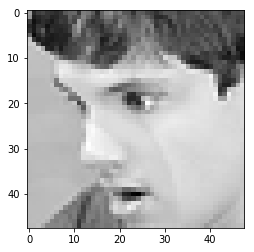

facial emotion: surprise


In [5]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad


[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [6]:
# YOUR CODE HERE

y_train_hs = y_training[(y_training[:,3] == 1) | (y_training[:,4] == 1),:]
y_test_hs = y_testing[(y_testing[:,3] == 1) | (y_testing[:,4] == 1),:]
x_train_hs = x_training[(y_training[:,3] == 1) | (y_training[:,4] == 1),:]
x_test_hs = x_testing[(y_testing[:,3] == 1) | (y_testing[:,4] == 1),:]
y_train_hs2 = y_train_hs[:, [3]].reshape(y_train_hs.shape[0],)
y_test_hs2 = y_test_hs[:, [3]].reshape(y_test_hs.shape[0],)

[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

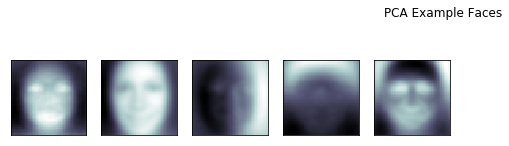

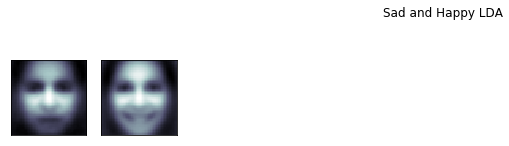

In [7]:
# YOUR CODE HERE
x_train_hs2 = x_train_hs.reshape(x_train_hs.shape[0], 48*48)
x_test_hs2 = x_test_hs.reshape(x_test_hs.shape[0], 48*48)
pca = PCA(n_components=100, whiten=True)
pca.fit(x_train_hs2)
pt = pca.transform(x_test_hs2)
fig = plt.figure(figsize=(16, 6))
fig.suptitle('PCA Example Faces')
for i in range(5):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(x_train_hs.shape[1], x_train_hs.shape[2]),
              cmap=plt.cm.bone)

lda = LDA()
lda.fit_transform(x_train_hs2, y_train_hs2)
means = lda.means_.reshape(2, 48, 48)

fig1 = plt.figure(figsize=(16,6));
fig1.suptitle('Sad and Happy LDA')
e = fig1.add_subplot(3, 10, 1, xticks=[], yticks=[])
e.imshow(means[0], cmap=plt.cm.bone)
e = fig1.add_subplot(3, 10, 2, xticks=[], yticks=[])
e.imshow(means[1], cmap=plt.cm.bone)

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [8]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train_hs2, y_train_hs2).predict(x_test_hs2)
print("Accuracy: ", (y_pred == y_test_hs2).sum()/y_test_hs2.size)


Accuracy:  0.5904392764857881


[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [ ]:
lg = LR(random_state = 0, solver='liblinear').fit(x_train_hs2, y_train_hs2)
y_pred = lg.predict(x_test_hs2)
print("Accuracy: ", (y_pred == y_test_hs2).sum()/y_test_hs2.size)

[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [28]:
sv = svm.LinearSVC().fit(x_train_hs2, y_train_hs2)
y_pred = sv.predict(x_test_hs2)
print("Accuracy: ", (y_pred == y_test_hs2).sum()/y_test_hs2.size)

Accuracy:  0.6214470284237726


[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

None of them are truly reliable given the results are under 70% accurate, but out of these options, logistic regression seems to be the most accurate. I would trust it the most.

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [ ]:
# YOUR CODE HERE
y = lg.decision_function(x_test_hs2)
norm = np.linalg.norm(lg.coef_)
distance = y/norm

print(distance)
happy = np.argpartition(distance, -5)[-5:]
sad = np.argpartition((distance*-1), -5)[-5:]

i = 0
for i in range(5):
    s1 = happy[i];
    plt.imshow(x_train_hs[s1, :], cmap='gray');
    plt.show();
    print('facial emotion: %s' % get_emotion(y_train_hs[s1, :]))

i = 0
for i in range(5):
    s2 = sad[i];
    plt.imshow(x_train_hs[s2, :], cmap='gray');
    plt.show();
    print('facial emotion: %s' % get_emotion(y_train_hs[s2, :]))

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


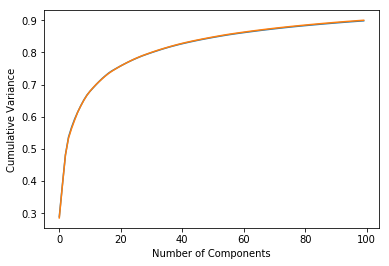

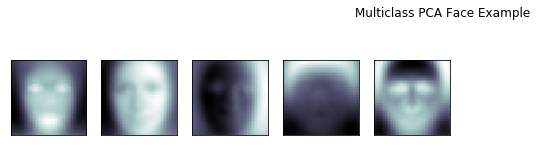

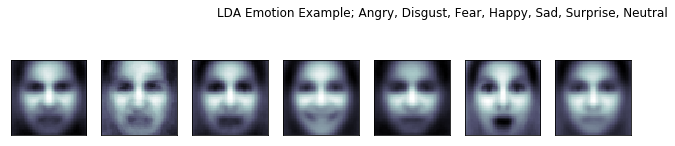

In [8]:
# YOUR CODE HERE
y_train2 = []
y_test2 = []
for i in range(len(y_training)):
    y_train2 = np.append(y_train2, np.argmax(y_training[i]))
for i in range(len(y_testing)):
    y_test2 = np.append(y_test2, np.argmax(y_testing[i]))
                    
x_train2 = x_training.reshape(x_training.shape[0],(48*48))
x_test2 = x_testing.reshape(x_testing.shape[0],(48*48))
pca1 = PCA(n_components=100, whiten=True)
pca1= pca1.fit(x_train2)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

fig2 = plt.figure(figsize=(16, 6))
fig2.suptitle('Multiclass PCA Face Example')
for i in range(5):
    ax = fig2.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca1.components_[i].reshape(x_training.shape[1], x_training.shape[2]),
              cmap=plt.cm.bone)
    
lda = LDA()
lda.fit_transform(x_train2, y_train2)
means = lda.means_.reshape(7, 48, 48)
fig1 = plt.figure(figsize=(16,6));
fig1.suptitle('LDA Emotion Example; Angry, Disgust, Fear, Happy, Sad, Surprise, Neutral')
for i in range(7):
    e = fig1.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    e.imshow(means[i], cmap=plt.cm.bone)


[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [9]:
y_pred = GaussianNB().fit(x_train2, y_train2).predict(x_test2)
print("Accuracy: ", (y_pred == y_test2).sum()/y_test2.size)

Accuracy:  0.22736138200055725


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

GaussianNB deals with multi-class nature problems in the same way as binary.  I attempted to use ComplementNB instead, but do not have the right version of sklearn. This would have increased accuracy.

<Figure size 432x288 with 0 Axes>

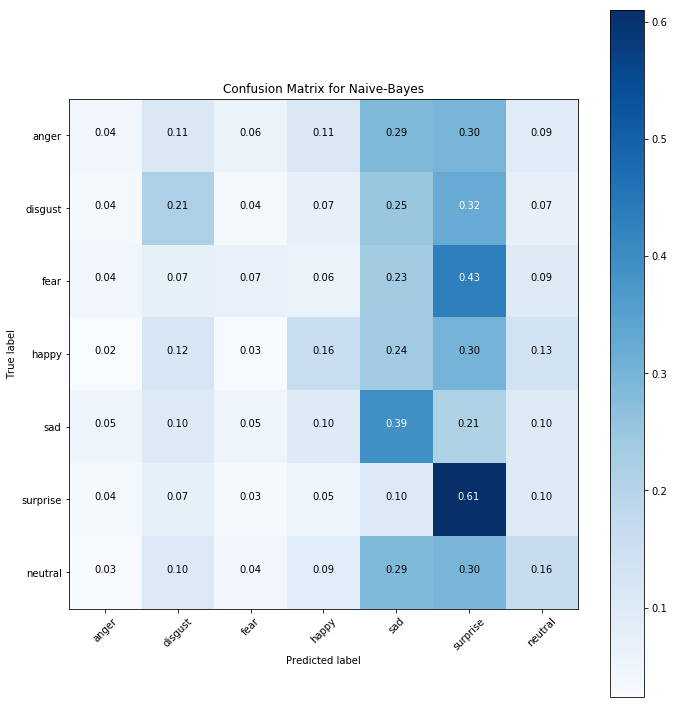

<Figure size 432x288 with 0 Axes>

In [10]:
classes = ['anger', 'disgust', 'fear', 'happy', 
               'sad', 'surprise', 'neutral']

cm = confusion_matrix(y_test2, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive-Bayes')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [20]:
mlg = LR(solver='lbfgs', multi_class = 'multinomial').fit(x_train2, y_train2)
y_pred = mlg.predict(x_test2)
print("Accuracy: ", (y_pred == y_test2).sum()/y_test2.size)

Accuracy:  0.3708553914739482


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

Our solver is set to lbfgs. It works well with optimization problems. It also supports multinomial, which liblinear does not.
Multinomial logistic regression deals with multiclass problems using logistic regression. It helps us find the estimated probabilities of a given subject given our data and classifications.

<Figure size 432x288 with 0 Axes>

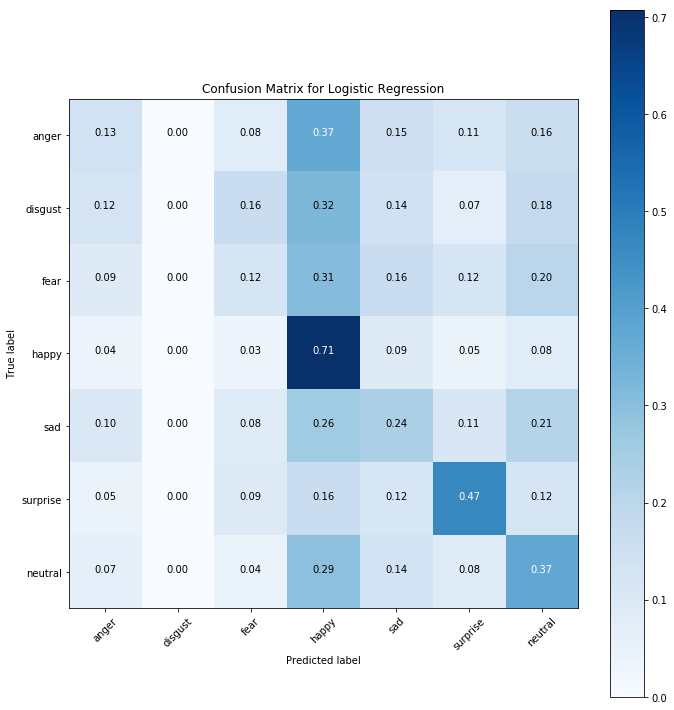

<Figure size 432x288 with 0 Axes>

In [21]:
cm = confusion_matrix(y_test2, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

np.set_printoptions(precision=2)

plt.figure()

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Accuracy:  0.1691278907773753


<Figure size 432x288 with 0 Axes>

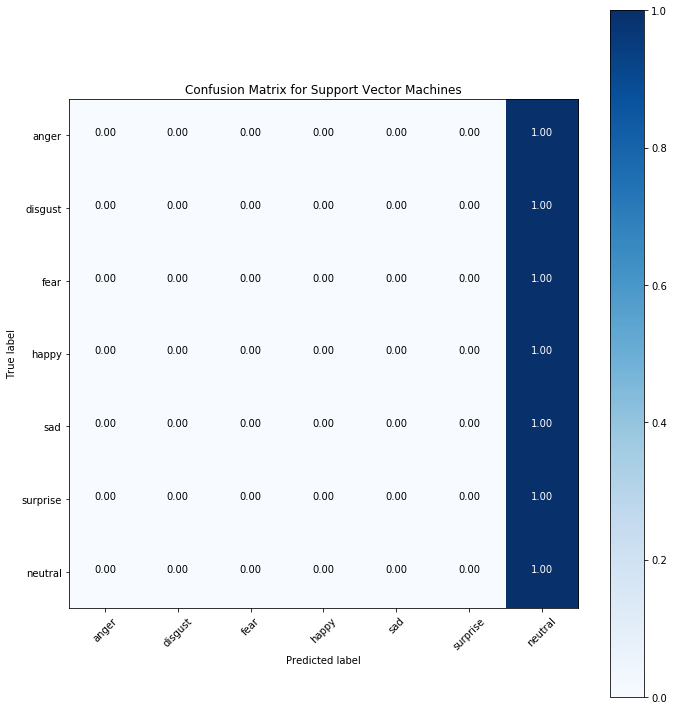

<Figure size 432x288 with 0 Axes>

In [18]:
pca2 = PCA(48)
x_train = pca2.fit_transform(x_train2)
x_test = pca2.fit_transform(x_test2)
msvm = SVC(kernel ='rbf', probability = True, max_iter = 1000)
msvm.fit(x_train, y_train2)

y_pred = msvm.predict(x_test)
print("Accuracy: ", (y_pred == y_test2).sum()/y_test2.size)
cm = confusion_matrix(y_test2, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Support Vector Machines')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

np.set_printoptions(precision=2)

plt.figure()

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

Because of the time to take for the SVM to run, I reduced the dimensions of the data through PCA to 48 components, and input the results into the SVM. 
Probability is set true so that we can have access to the probabilities of each emotion being classified as every other emotion, not just it's own. Did not use predict_proba. RBF is good with large quantities of data, and I limit the iterations to 1000 for the purpose of time. Some of these factors reduced the accuracy.

[2 Marks] e. Which categories of faces seem to be most similar or least similar?

Because of the poor probability I achieved, there is no noticable, accurate representation that will give me the most or least similar faces. From the information given above, happy and surprise are least similar when looking at the confusion matrix of logistic regression. Happy is the most similar to the emotions presented, because the faces are misrepresented as happy at the highest probability.

# 8318 only

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[6 Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [43]:
# YOUR CODE HERE